### HAM 10000

* [Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T)

* [Original Paper](https://www.nature.com/articles/sdata2018161)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/ham10000/'
COLUMN = 'embeddings'

In [3]:
text_path, images_path = os.listdir(PATH)

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image_id,dx,text,split,embeddings
0,ISIC_0033319,nv,Patient diagnosed via histo. Age: 35 years. Se...,train,"[3.236721992492676, -0.7394944429397583, 2.767..."
1,ISIC_0030823,nv,Patient diagnosed via follow_up. Age: 40 years...,train,"[3.1978533267974854, -1.3737833499908447, 3.03..."
2,ISIC_0028730,akiec,Patient diagnosed via histo. Age: 65 years. Se...,train,"[3.1016488075256348, -0.910774290561676, 2.712..."
3,ISIC_0027299,nv,Patient diagnosed via follow_up. Age: 40 years...,train,"[3.1515274047851562, -1.0320912599563599, 2.47..."
4,ISIC_0032444,nv,Patient diagnosed via histo. Age: 65 years. Se...,train,"[3.1069583892822266, -1.0400464534759521, 2.30..."
...,...,...,...,...,...
10010,ISIC_0034116,nv,Patient diagnosed via histo. Age: 35 years. Se...,test,"[3.2164361476898193, -0.7670844793319702, 3.04..."
10011,ISIC_0026453,bcc,Patient diagnosed via histo. Age: 55 years. Se...,test,"[3.0540246963500977, -0.9477623105049133, 2.34..."
10012,ISIC_0029885,mel,Patient diagnosed via histo. Age: 35 years. Se...,test,"[3.058117151260376, -0.9321731925010681, 2.385..."
10013,ISIC_0033226,mel,Patient diagnosed via histo. Age: 65 years. Se...,test,"[2.567990779876709, -0.786322295665741, 2.1221..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,ISIC_0034270.jpg,0.788414,-0.175732,0.571870,-3.324638,1.868513,-3.654095,1.181180,-0.911827,-1.607665,...,0.156191,-1.275873,-0.159357,0.137761,1.449755,1.265087,-0.351541,-2.545814,-0.105099,-2.420387
1,ISIC_0028607.jpg,0.779679,-1.515092,1.360622,-0.367401,-1.459929,-5.119742,-0.694750,-0.838915,-1.972777,...,-0.695410,-1.646969,-0.975410,-1.318180,1.085200,-2.449388,1.271104,-2.958441,-2.017804,-2.190779
2,ISIC_0033962.jpg,1.187722,-0.242720,2.727305,-0.350272,0.690375,-3.688381,0.674369,-1.261206,-2.153090,...,-0.567914,-1.451659,-1.796797,0.030802,1.300691,0.447621,0.420344,-1.756530,-0.356660,-3.559395
3,ISIC_0034205.jpg,1.792122,-1.577801,1.715291,-2.408758,0.636901,-4.870243,2.044212,-1.625948,-1.264762,...,0.660257,-2.851650,-1.287652,-0.034494,0.609628,2.412038,-1.139721,-4.104665,0.642429,-1.408910
4,ISIC_0033155.jpg,0.127771,0.933990,-0.058526,-3.397099,0.952787,-3.337882,1.368866,-1.483904,-1.112241,...,-0.126982,0.255524,0.010045,1.304554,2.662700,-0.100018,-0.582395,-1.632171,1.970989,-0.681773


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image_id", "ImageName")
df.drop(columns='text', inplace=True)
df.head()

,dx,split,text_1,text_2,text_3,text_4,text_5,text_6,text_7,text_8,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,nv,train,3.236722,-0.739494,2.767815,2.977734,0.151343,1.922289,-0.614234,-0.036614,...,0.151610,-0.416720,-0.741418,-0.195960,1.777167,1.339372,-1.264874,-2.068761,0.750921,-2.047840
1,nv,train,3.197853,-1.373783,3.037363,2.311507,1.628178,0.383299,-1.635776,1.009209,...,0.043114,-1.430739,-0.509843,0.542778,0.117624,1.338904,-0.256517,-1.047065,0.875867,-1.740106
2,akiec,train,3.101649,-0.910774,2.712828,3.315805,0.162183,1.690392,-0.627258,0.270939,...,0.967768,-3.906605,-0.074423,-0.327721,2.269238,0.344848,-1.425140,-2.678744,-1.339433,-3.752901
3,nv,train,3.151527,-1.032091,2.471391,3.638098,0.970964,1.238591,-0.291014,0.352654,...,-0.069756,-1.501771,-0.059097,1.069056,0.486885,1.278436,0.518448,-3.212569,-2.012066,-0.775845
4,nv,train,3.106958,-1.040046,2.301498,2.111029,1.114050,1.175306,-0.688185,0.991874,...,-0.300747,-2.016899,-1.806851,-1.276631,0.606535,-0.106882,-0.666254,-1.708952,-0.982433,-3.697665


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'dx'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (8012, 4866)
Test Shape: (2003, 4866)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
if label_columns == 'DR_2':
    output_size = 1
else:
    output_size = len(pd.unique(train_df[label_columns]))
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.38 MB
The number of parameters of the model are: 623879


STAGE:2024-02-06 15:42:11 57183:57183 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.5522
Epoch 1/15 - Training Time: 0.83 seconds | Inference Time: 0.23 seconds
Epoch 2/15 - Test Accuracy: 0.6690
Epoch 2/15 - Training Time: 0.89 seconds | Inference Time: 0.25 seconds
Epoch 3/15 - Test Accuracy: 0.6525
Epoch 3/15 - Training Time: 0.95 seconds | Inference Time: 0.26 seconds
Epoch 4/15 - Test Accuracy: 0.7494
Epoch 4/15 - Training Time: 0.95 seconds | Inference Time: 0.25 seconds
Epoch 5/15 - Test Accuracy: 0.6675
Epoch 5/15 - Training Time: 0.97 seconds | Inference Time: 0.25 seconds
Epoch 6/15 - Test Accuracy: 0.7344
Epoch 6/15 - Training Time: 0.97 seconds | Inference Time: 0.27 seconds
Epoch 7/15 - Test Accuracy: 0.7414
Epoch 7/15 - Training Time: 0.94 seconds | Inference Time: 0.26 seconds
Epoch 8/15 - Test Accuracy: 0.7609
Epoch 8/15 - Training Time: 0.98 seconds | Inference Time: 0.26 seconds
Epoch 9/15 - Test Accuracy: 0.7119
Epoch 9/15 - Training Time: 0.99 seconds | Inference Time: 0.27 seconds
Epoch 10/15 - Test Accuracy: 0.7459
E

STAGE:2024-02-06 15:42:31 57183:57183 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-06 15:42:31 57183:57183 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.21%        1.442s        62.51%        9.790s       5.180ms      -2.18 Gb      -2.19 Gb          1890  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        30.54%        4.783s        30.97%        4.850s       2.021ms       2.73 Gb       2.72 Gb          2400  
                              Optimizer.step#AdamW.step         4.74%     741.806ms        20.44%        3.202s       1.694ms       4.76 Mb      -8.75

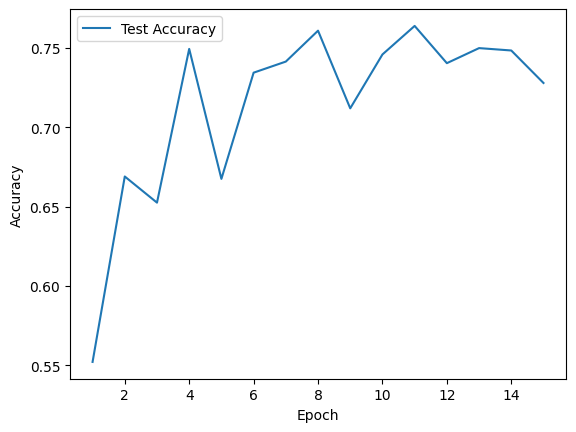

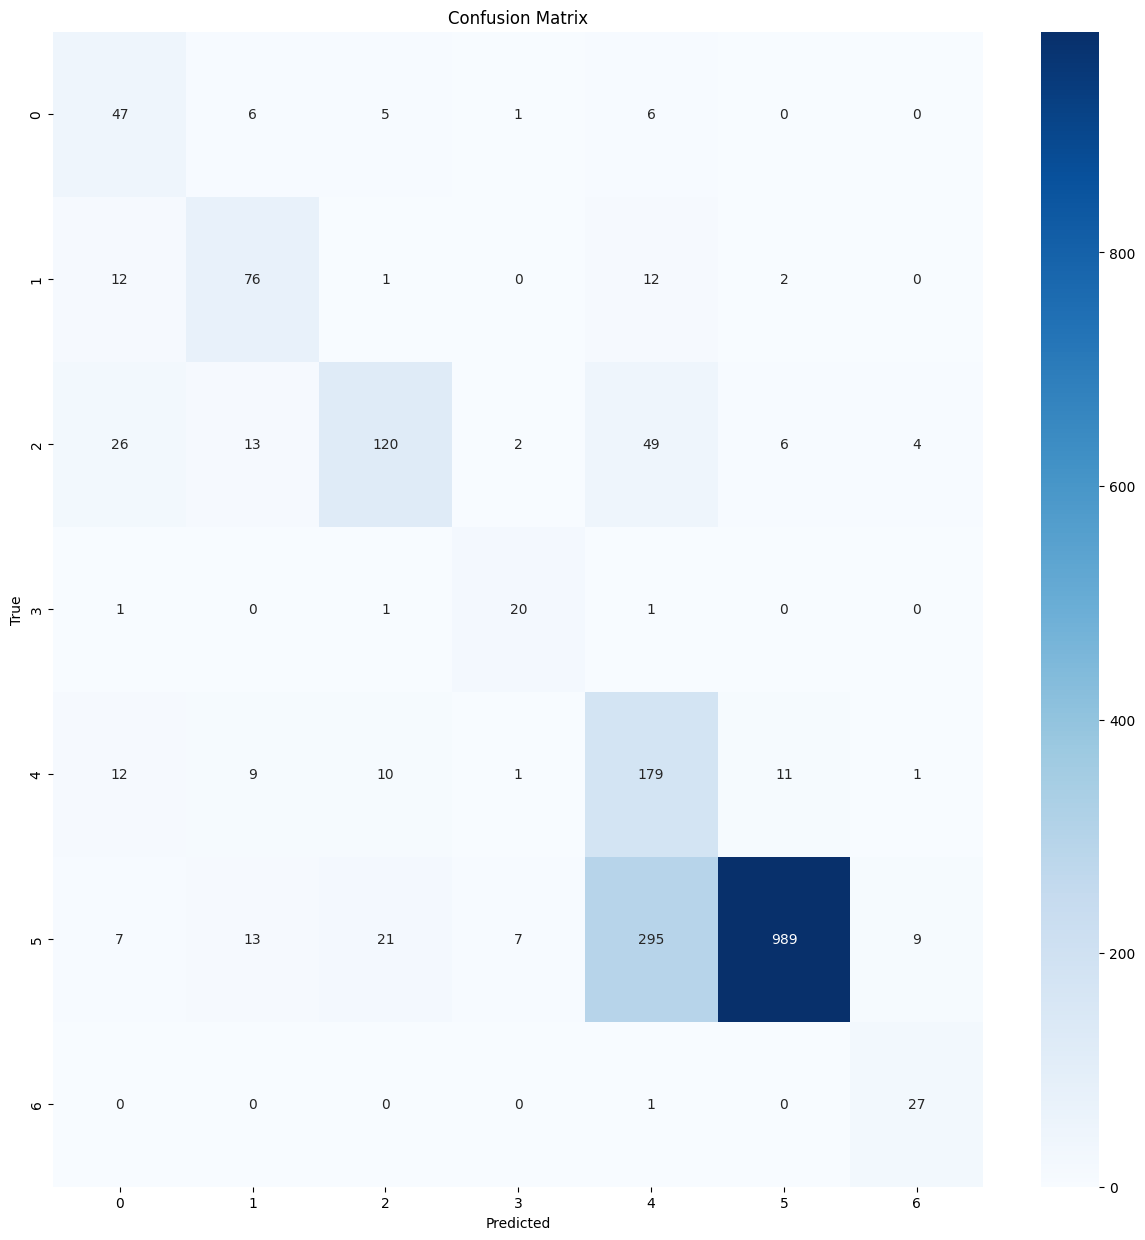

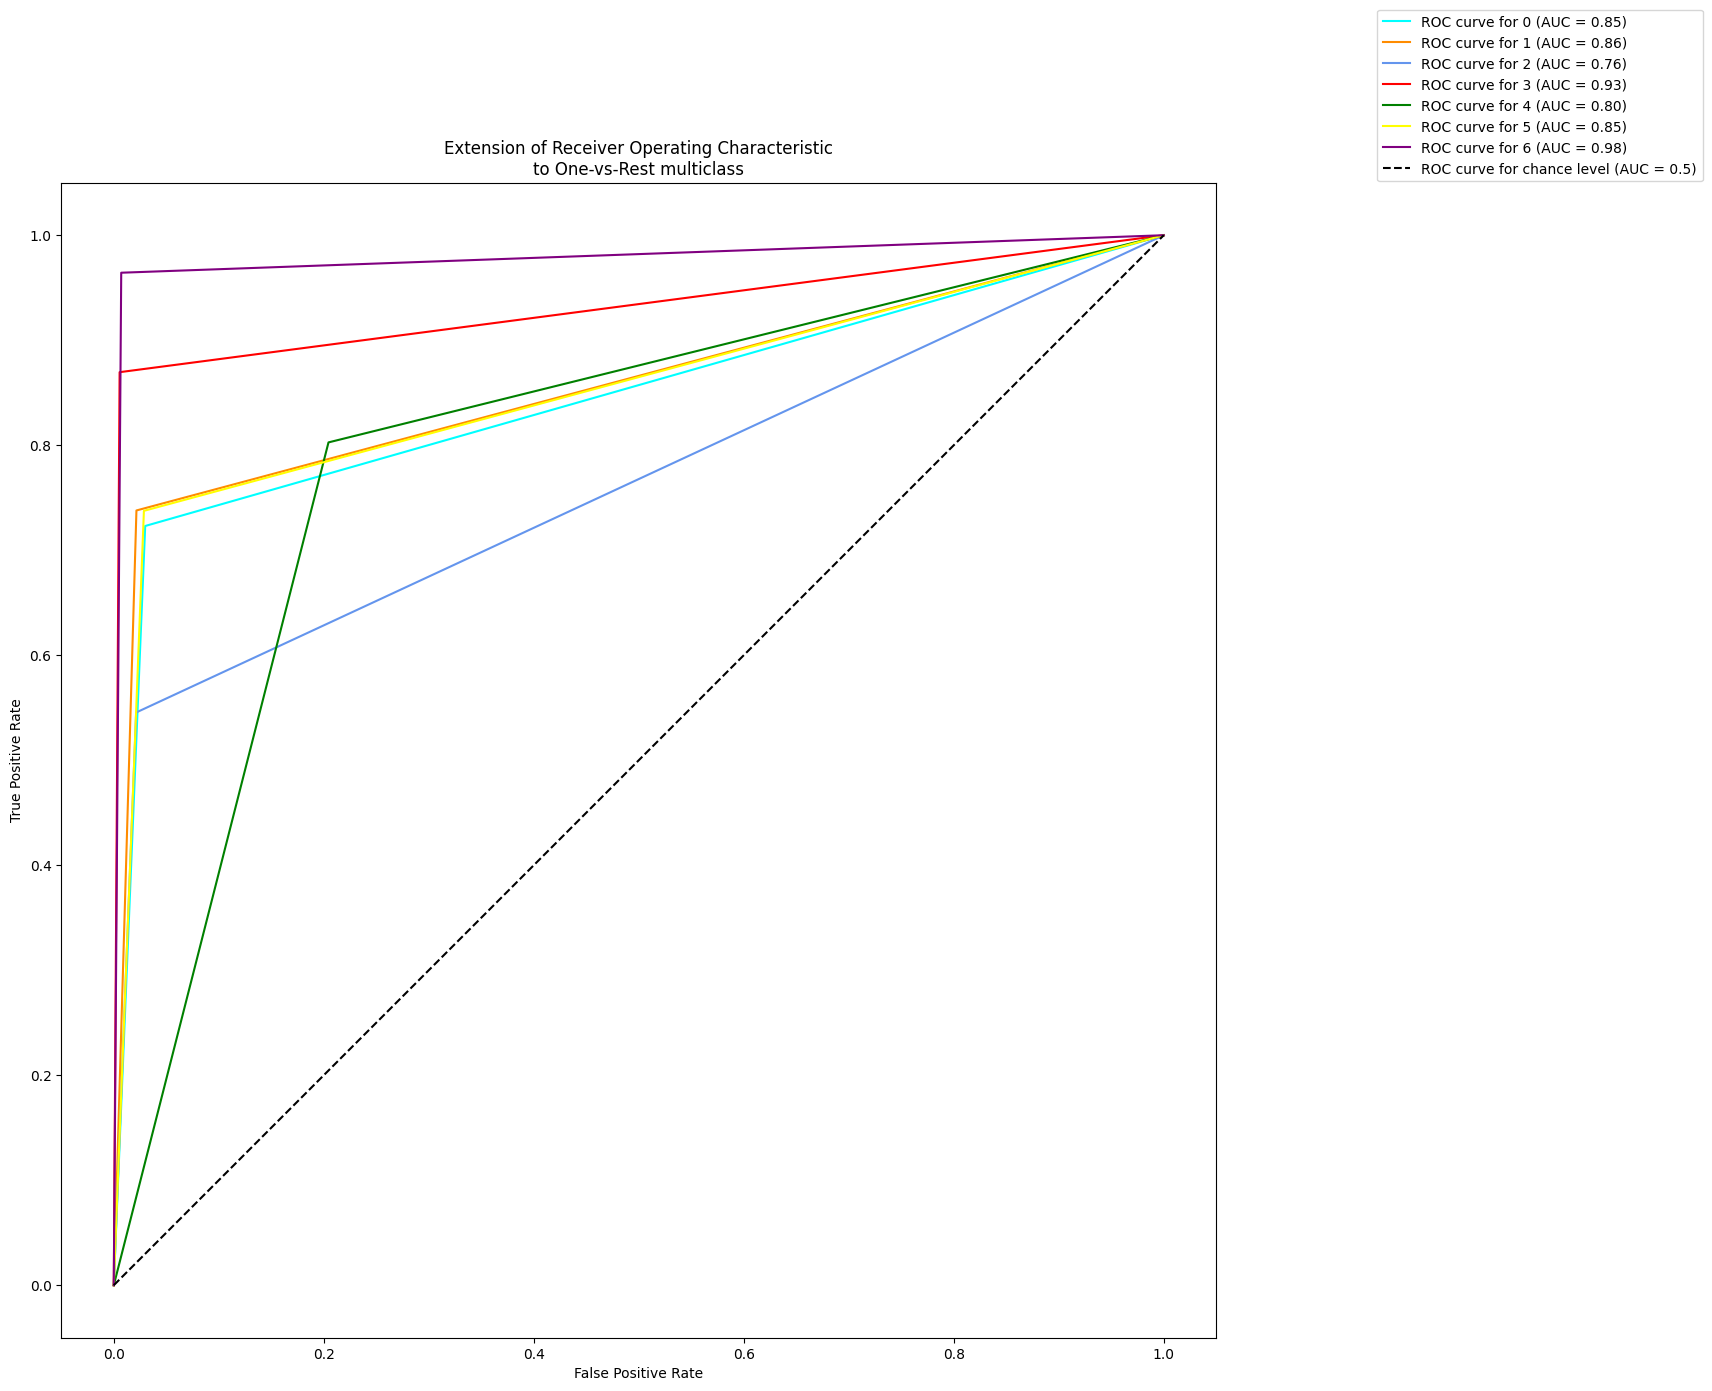

              precision    recall  f1-score   support

           0       0.45      0.72      0.55        65
           1       0.65      0.74      0.69       103
           2       0.76      0.55      0.63       220
           3       0.65      0.87      0.74        23
           4       0.33      0.80      0.47       223
           5       0.98      0.74      0.84      1341
           6       0.66      0.96      0.78        28

    accuracy                           0.73      2003
   macro avg       0.64      0.77      0.67      2003
weighted avg       0.84      0.73      0.76      2003



In [9]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)

Training Late Fusion Model:
Model Memory Usage: 1.19 MB
The number of parameters of the model are: 312583


STAGE:2024-02-06 15:43:57 57183:57183 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.5457
Epoch 1/15 - Training Time: 1.14 seconds | Inference Time: 0.35 seconds
Epoch 2/15 - Test Accuracy: 0.6755
Epoch 2/15 - Training Time: 1.04 seconds | Inference Time: 0.37 seconds
Epoch 3/15 - Test Accuracy: 0.7444
Epoch 3/15 - Training Time: 1.04 seconds | Inference Time: 0.36 seconds
Epoch 4/15 - Test Accuracy: 0.7019
Epoch 4/15 - Training Time: 1.17 seconds | Inference Time: 0.38 seconds
Epoch 5/15 - Test Accuracy: 0.7793
Epoch 5/15 - Training Time: 1.12 seconds | Inference Time: 0.37 seconds
Epoch 6/15 - Test Accuracy: 0.7773
Epoch 6/15 - Training Time: 1.41 seconds | Inference Time: 0.37 seconds
Epoch 7/15 - Test Accuracy: 0.7733
Epoch 7/15 - Training Time: 1.09 seconds | Inference Time: 0.38 seconds
Epoch 8/15 - Test Accuracy: 0.7309
Epoch 8/15 - Training Time: 0.98 seconds | Inference Time: 0.38 seconds
Epoch 9/15 - Test Accuracy: 0.7718
Epoch 9/15 - Training Time: 1.05 seconds | Inference Time: 0.38 seconds
Epoch 10/15 - Test Accuracy: 0.7738
E

STAGE:2024-02-06 15:44:21 57183:57183 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-06 15:44:22 57183:57183 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch        11.19%        1.862s        63.20%       10.523s       4.440ms      -2.72 Gb      -2.73 Gb          2370  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        36.35%        6.051s        36.74%        6.117s       2.549ms       2.73 Gb       2.72 Gb          2400  
                              Optimizer.step#AdamW.step         6.26%        1.042s        26.56%        4.422s       2.339ms       2.38 Mb      -4.37

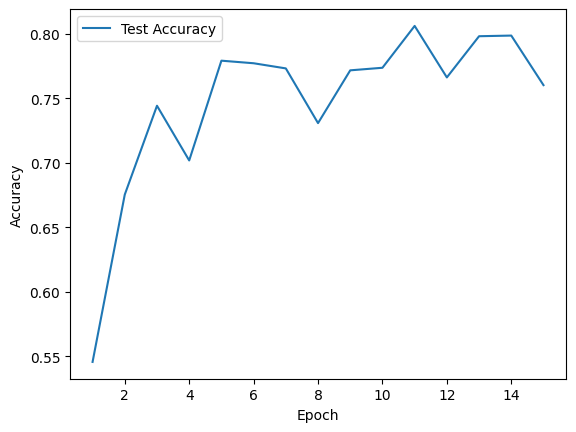

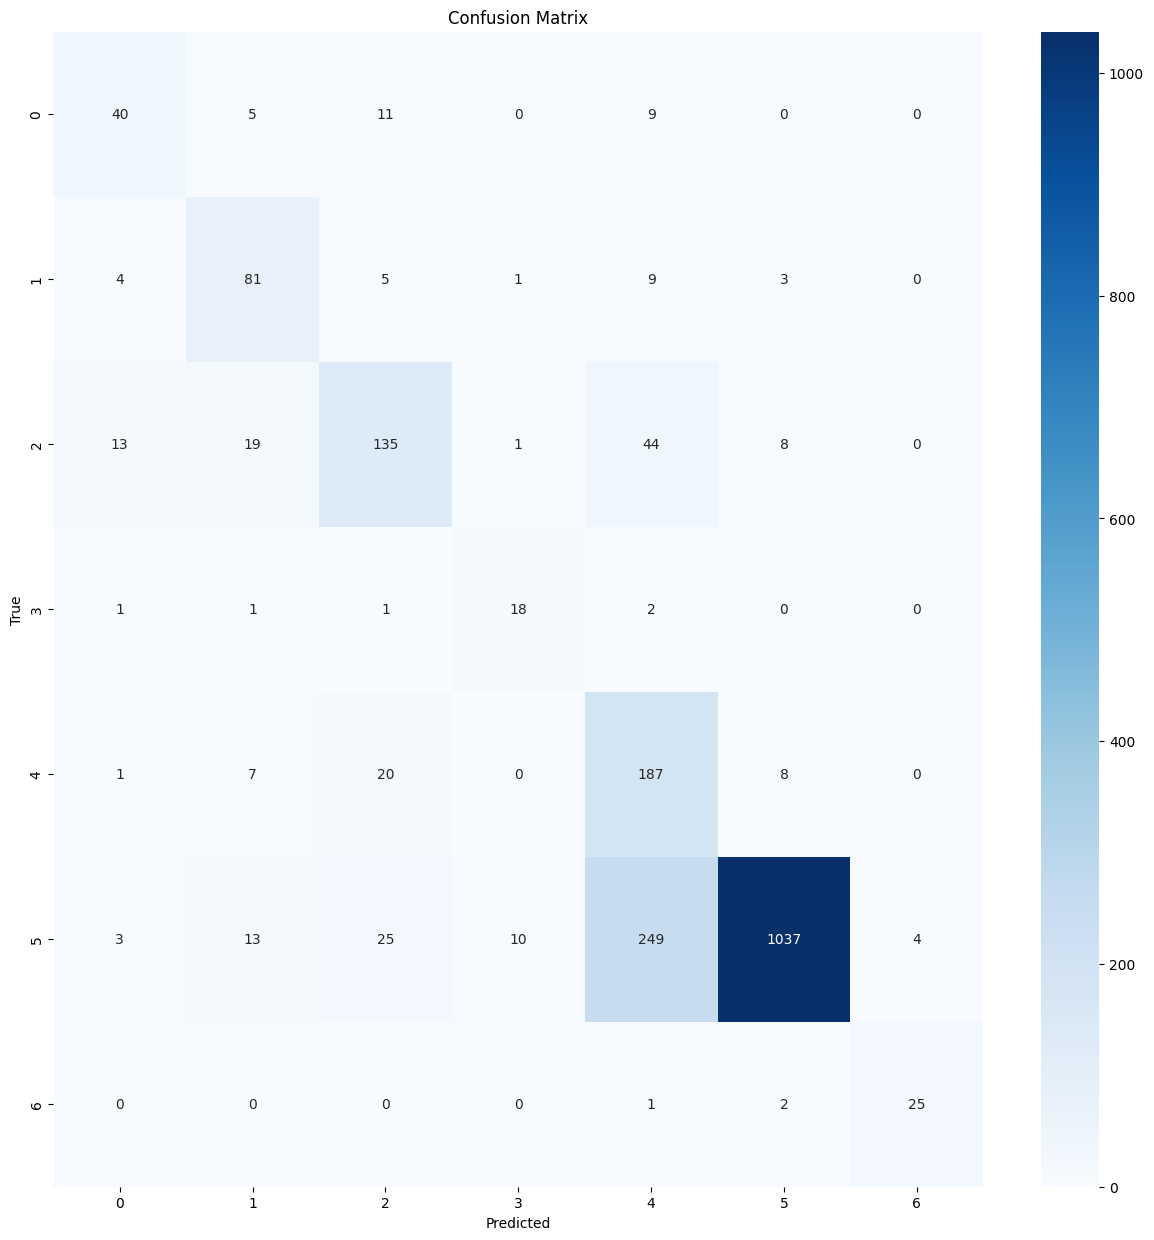

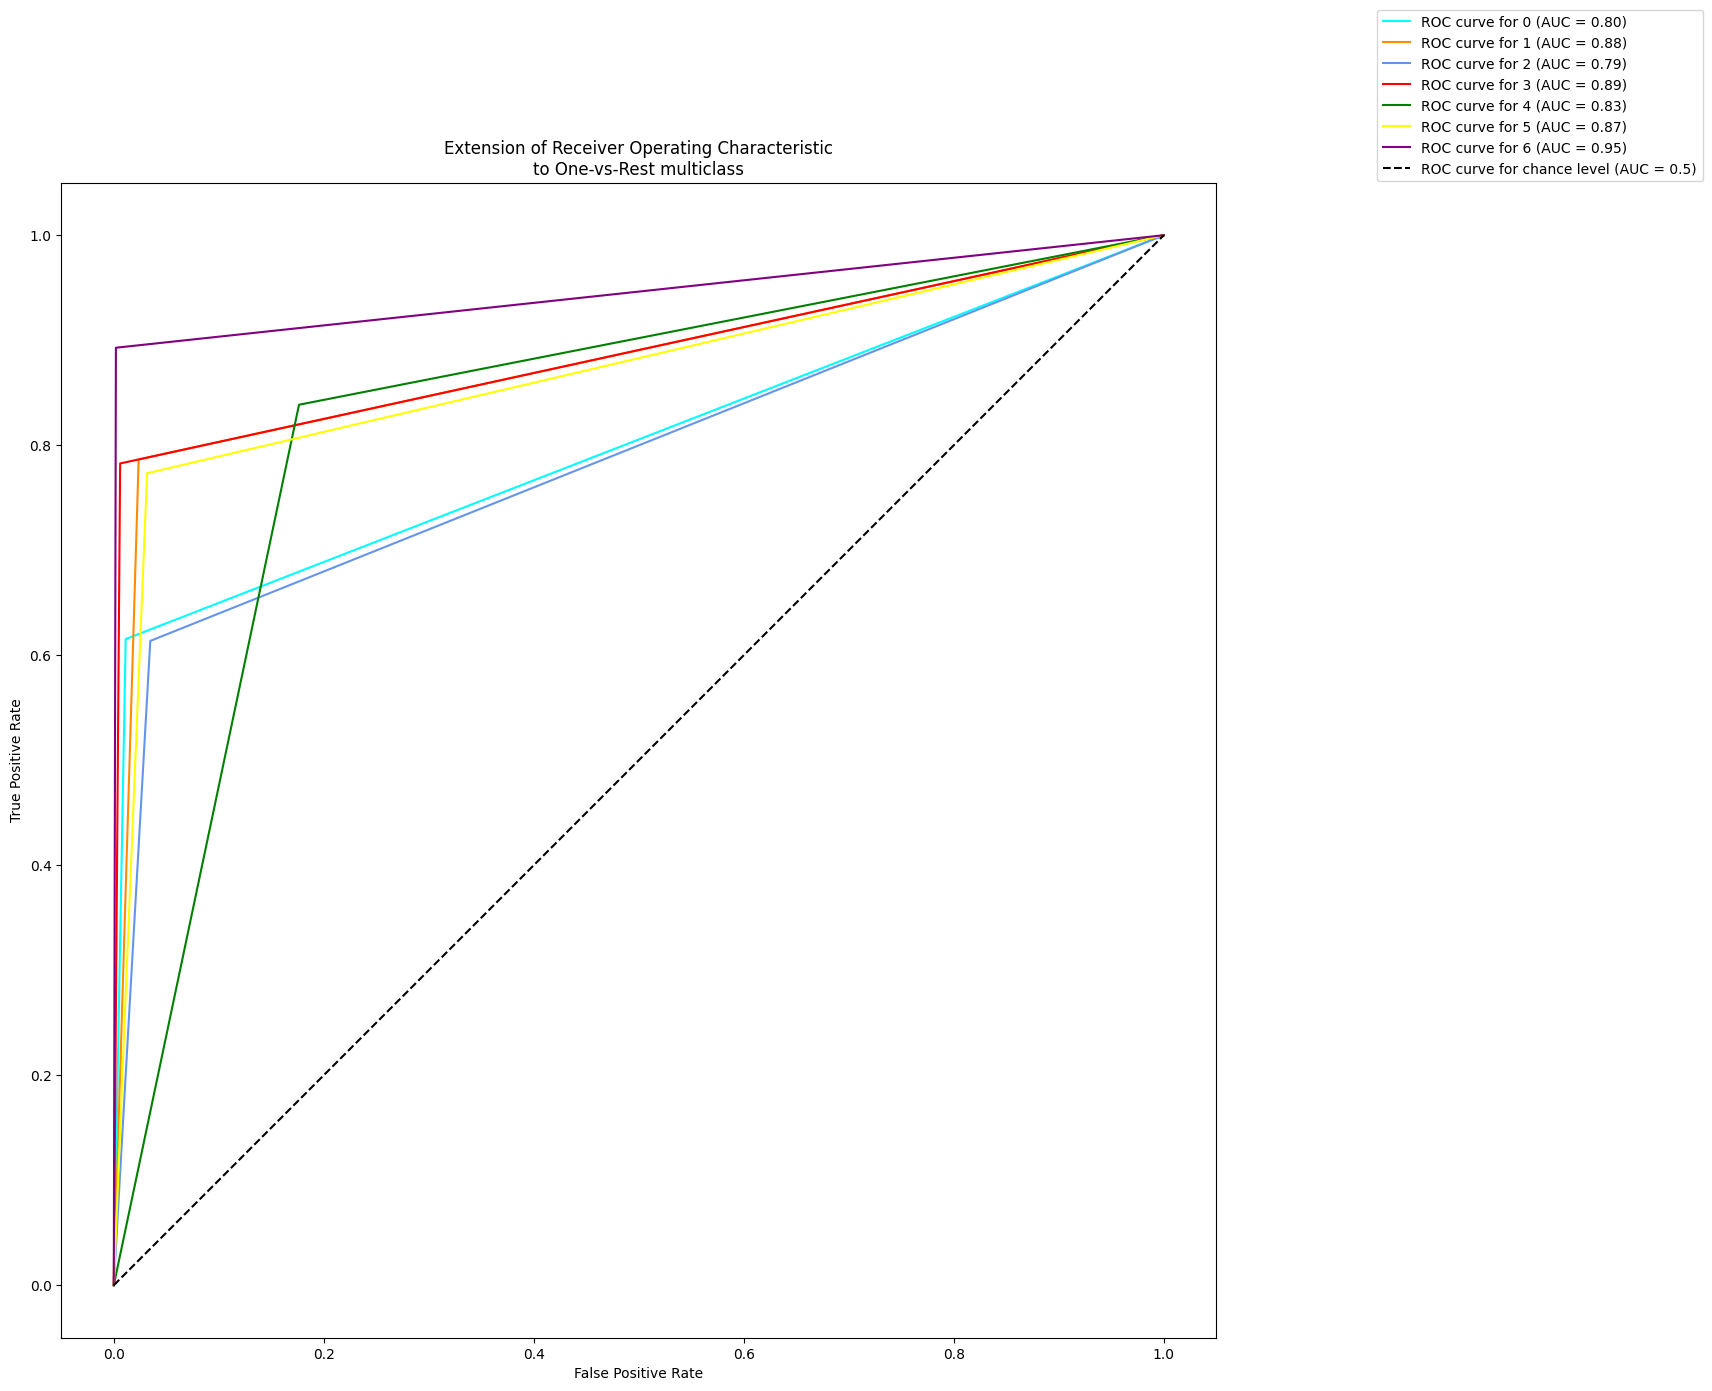

              precision    recall  f1-score   support

           0       0.65      0.62      0.63        65
           1       0.64      0.79      0.71       103
           2       0.69      0.61      0.65       220
           3       0.60      0.78      0.68        23
           4       0.37      0.84      0.52       223
           5       0.98      0.77      0.86      1341
           6       0.86      0.89      0.88        28

    accuracy                           0.76      2003
   macro avg       0.68      0.76      0.70      2003
weighted avg       0.85      0.76      0.78      2003



In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True)